In [1]:
# load libraries
library(dplyr)
library("edgeR")
library(Matrix)
library(gplots)
library(RColorBrewer)
library(irlba)
library(proxy)
library(png)
library(tidyverse)
library(ComplexHeatmap)
library(here)


working_dir <- "/scratch/jpm73279/comparative_single_cell/08.annotation_figures/zea_mays"

# load arguments
#args <- commandArgs(T)
#if(length(args)!=5){stop("Rscript normGBA.R <gene.sparse> <meta> <Zea_mays.AGPv4.36.Allgene.nuclear.bed> <prefix> <F>")}
#input_data <- as.character(args[1])
#meta <- as.character(args[2])
#gene <- as.character(args[3])
#prefix <- as.character(args[4])



#gene_bodysorghum_bicolor_tis_leaf_nmf_step_2_knn_27.out.de_novo.rds
input <- here(working_dir,"00.data/zea_mays.gene_body_acc_leaf_V3_clustering_strict.counts.tab.txt")
#input_2 <- here("/home/jpm73279/r_script_dev/lw_plotting","zea_mays.normalized_gene_acc_scores.leaf_svd_knn_100_strict.GBaccessibility.sparse")
meta <- here(working_dir,"00.data/Zm.leaf_annot.V4.meta.final.txt")
gene <- here(working_dir,"00.data/Zm.markers.leaf.txt")
gene_DA <- here(working_dir,"00.data/Zm-B73-REFERENCE-NAM_Zm00001eb.1.genes.bed")
#prefix <- "TEST_SORGHUM_TEST"

meta_data <- read.delim(meta)
gene_markers <- read.delim(gene)
gene_markers <- gene_markers  %>%
    arrange(type)

all_markers <- gene_markers$geneID

raw_cpm_counts_all_genes <- read_delim(input, delim="\t", col_names = c("gene_name", "barcode", "accessability")) %>%
    dplyr::mutate(cellID = barcode)  %>%
    dplyr::mutate(geneID = gene_name)

colnames(meta_data)

merged_meta_cpm_information <- left_join(meta_data, raw_cpm_counts_all_genes, by = c("cellID"))  %>%
    #mutate(safe_cluster_name = str_c("Louvain_C", LouvainClusters, sep ="_"))  %>%
    #dplyr::select(-LouvainClusters)  %>%
    group_by(v4_annotation_n, geneID)  %>%
    summarise(counts = sum(accessability, na.rm = TRUE))

### Alt CPM Calc
merged_meta_cpm_information_copied <- merged_meta_cpm_information
catch <- merged_meta_cpm_information_copied  %>%
    group_by(v4_annotation_n) %>%
    group_map(~(cpm(.x$counts, log = FALSE, group = .f)), .keep = TRUE)  %>%
    unlist()



caught_values <- as_tibble(catch)
see <- ungroup(merged_meta_cpm_information_copied)
merged_meta_cpm_information_copied<- bind_cols(merged_meta_cpm_information_copied,caught_values)  %>% 
    rename(grouped_CPM = value)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: limma


Attaching package: ‘gplots’


The following object is masked from ‘package:stats’:

    lowess


Warning message:
“package ‘RColorBrewer’ was built under R version 4.2.1”

Attaching package: ‘proxy’


The following object is masked from ‘package:Matrix’:

    as.matrix


The following objects are masked from ‘package:stats’:

    as.dist, dist


The following object is masked from ‘package:base’:

    as.matrix


── Attaching packages ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6     ✔ purrr   0.3.5
✔ tibble  3.1.8     ✔ stringr 1.4.1
✔ tidyr   1.2.1     ✔ forcats 0.5.2
✔ readr   2.1.2     
Warning message:
“package ‘ggplot2’ was built under 

[1] "cellID"                       "total"                       
 [3] "tss"                          "acrs"                        
 [5] "ptmt"                         "nSites"                      
 [7] "log10nSites"                  "pTSS"                        
 [9] "FRiP"                         "pOrg"                        
[11] "tss_z"                        "acr_z"                       
[13] "sites_z"                      "qc_check"                    
[15] "background"                   "cellbulk"                    
[17] "is_cell"                      "sampleID"                    
[19] "umap1"                        "umap2"                       
[21] "doubletscore"                 "d.type"                      
[23] "ptmt_ratio"                   "LouvainClusters"             
[25] "Zm_v4_annot"                  "Zm_v4_annot.subcluster_annot"
[27] "Zm.vasculature_lc"            "Zm.epidermis_lc"             
[29] "Zm.mesophyll_lc"              "v4_annotation_n"             
[31] "total_cell_count"

`summarise()` has grouped output by 'v4_annotation_n'. You can override using the `.groups` argument.


In [2]:
file_names_altered <- c("zea.V2_annot.equal_cell_pops/zea_mays.annotation_V2.DA_genes.bundle_sheath_ncell_2035.NA.cluster_specific.tsv",
"zea.V2_annot.equal_cell_pops/zea_mays.annotation_V2.DA_genes.companion_cell_ncell_714.NA.cluster_specific.tsv",
"zea.V2_annot.equal_cell_pops/zea_mays.annotation_V2.DA_genes.developing_bundle_sheath_ncell_410.NA.cluster_specific.tsv",
"zea.V2_annot.equal_cell_pops/zea_mays.annotation_V2.DA_genes.epidermis_ncell_3005.NA.cluster_specific.tsv",
"zea.V2_annot.equal_cell_pops/zea_mays.annotation_V2.DA_genes.guard_cell_ncell_312.NA.cluster_specific.tsv",
"zea.V2_annot.equal_cell_pops/zea_mays.annotation_V2.DA_genes.guard_mother_cell_ncell_82.NA.cluster_specific.tsv",
"zea.V2_annot.equal_cell_pops/zea_mays.annotation_V2.DA_genes.leaf_primordia_ncell_466.NA.cluster_specific.tsv",
"zea.V2_annot.equal_cell_pops/zea_mays.annotation_V2.DA_genes.mesophyll_ncell_4569.NA.cluster_specific.tsv",
"zea.V2_annot.equal_cell_pops/zea_mays.annotation_V2.DA_genes.phloem_SE_ncell_1456.NA.cluster_specific.tsv",
"zea.V2_annot.equal_cell_pops/zea_mays.annotation_V2.DA_genes.protoderm_ncell_1459.NA.cluster_specific.tsv",
"zea.V2_annot.equal_cell_pops/zea_mays.annotation_V2.DA_genes.sclerenchymaous_bundle_sheath_ncell_396.NA.cluster_specific.tsv",
"zea.V2_annot.equal_cell_pops/zea_mays.annotation_V2.DA_genes.unknown_ncell_234.NA.cluster_specific.tsv",
"zea.V2_annot.equal_cell_pops/zea_mays.annotation_V2.DA_genes.vascular_parenchyma_like_ncell_25.NA.cluster_specific.tsv",
"zea.V2_annot.equal_cell_pops/zea_mays.annotation_V2.DA_genes.vascular_phloem_like_ncell_31.NA.cluster_specific.tsv",
"zea.V2_annot.equal_cell_pops/zea_mays.annotation_V2.DA_genes.xylem_ncell_79.NA.cluster_specific.tsv",
"zea.V2_annot.equal_cell_pops/zea_mays.annotation_V2.DA_genes.xylem_parenchya_ncell_568.NA.cluster_specific.tsv")

read_DA_genes_altered <- function(file_name){
    
    working_dir <- "/scratch/jpm73279/comparative_single_cell/08.annotation_figures/zea_mays"
    replace_name <- paste0(working_dir, "/zea.V2_annot/zea_mays.annotation_V2.")
    filtered <- read_tsv(here(working_dir,file_name), col_names = TRUE,id = "origin")  %>% 
        mutate(origin = str_replace(origin, "/scratch/jpm73279/comparative_single_cell/08.annotation_figures/zea_mays/zea.V2_annot.equal_cell_pops/zea_mays.annotation_V2.", ""))  %>% 
        mutate(origin = str_replace(origin, ".NA.cluster_specific.tsv", ""))  %>% 
        filter(padj < .05)
    
    return(filtered)    
}

read_all_DA_genes_altered <- lapply(file_names_altered, read_DA_genes_altered)
all_merge_values_altered <- data.table::rbindlist(read_all_DA_genes_altered)

ERROR: Error: '/scratch/jpm73279/comparative_single_cell/08.annotation_figures/zea_mays/zea.V2_annot.equal_cell_pops/zea_mays.annotation_V2.DA_genes.bundle_sheath_ncell_2035.NA.cluster_specific.tsv' does not exist.


In [3]:
merge_values_altered <- all_merge_values_altered %>% 
    group_by(origin) %>% 
    slice_min(padj, n =100)

    

ERROR: Error in group_by(., origin): object 'all_merge_values_altered' not found


In [3]:
merged_meta_cpm_information_copied

v4_annotation_n,geneID,counts,grouped_CPM
<chr>,<chr>,<dbl>,<dbl>
bundle_sheath_ncell_3088,Zm00001eb000010,59,10.3785588
bundle_sheath_ncell_3088,Zm00001eb000020,22,3.8699711
bundle_sheath_ncell_3088,Zm00001eb000050,4,0.7036311
bundle_sheath_ncell_3088,Zm00001eb000060,124,21.8125643
bundle_sheath_ncell_3088,Zm00001eb000070,59,10.3785588
bundle_sheath_ncell_3088,Zm00001eb000080,238,41.8660508
bundle_sheath_ncell_3088,Zm00001eb000100,36,6.3326800
bundle_sheath_ncell_3088,Zm00001eb000120,14,2.4627089
bundle_sheath_ncell_3088,Zm00001eb000140,10,1.7590778


In [4]:
head(merged_meta_cpm_information_copied)
altered_deseq2 <- merged_meta_cpm_information_copied %>% 
    dplyr::select(-counts) %>% 
    pivot_wider(names_from = geneID, values_from = grouped_CPM, values_fill = 0) %>% 
    pivot_longer(cols = -v4_annotation_n, names_to = "geneID", values_to = "grouped_CPM") %>% 
    group_by(geneID) %>% 
    mutate(Zscore = scale(grouped_CPM)) %>% 
    ungroup()  %>% 
    #mutate(relative_accessability = rescale(Zscore, to = c(0,1))) %>% 
    group_by(v4_annotation_n)  %>% 
    mutate(Zscore_group = scale(Zscore))

# Create Proportion Cells Accessible Metrics ------------------------------
merged_meta_cellID_values <- left_join(meta_data, raw_cpm_counts_all_genes, by = c("cellID"))
take_unq_genes <- unique(merged_meta_cellID_values$geneID)


merged_meta_cellID_values_all_genes <- merged_meta_cellID_values %>% 
    select(cellID, v4_annotation_n, accessability, geneID) 


colnames(merged_meta_cellID_values_all_genes)
colnames(merged_meta_cellID_values_all_genes)

wider_all_genes_altered <- merged_meta_cellID_values_all_genes %>% 
                    pivot_wider(names_from = geneID, 
                                values_from = accessability,  
                                values_fill = 0) %>% 
                    pivot_longer(cols = c(-v4_annotation_n, -cellID), 
                                 names_to = "geneID", 
                                 values_to = "accessability") %>% 
                    mutate(expression_bool = case_when(accessability < 1 ~ 0,
                                                       accessability >= 1 ~ 1)) %>% 
                    group_by(v4_annotation_n, geneID) %>% 
                    summarise(total_cells = n(), 
                              proportion_expressing = (sum(expression_bool)/total_cells * 100))


colnames(merged_meta_cellID_values_all_genes)
merged_meta_cellID_values_all_genes %>% 
    group_by(v4_annotation_n) %>% 
    select(-accessability, -cellID) %>% 
    unique() %>% 
    summarise(count = n())

v4_annotation_n,geneID,counts,grouped_CPM
<chr>,<chr>,<dbl>,<dbl>
bundle_sheath_ncell_3088,Zm00001eb000010,59,10.3785588
bundle_sheath_ncell_3088,Zm00001eb000020,22,3.8699711
bundle_sheath_ncell_3088,Zm00001eb000050,4,0.7036311
bundle_sheath_ncell_3088,Zm00001eb000060,124,21.8125643
bundle_sheath_ncell_3088,Zm00001eb000070,59,10.3785588
bundle_sheath_ncell_3088,Zm00001eb000080,238,41.8660508


[1] "cellID"          "v4_annotation_n" "accessability"   "geneID"

[1] "cellID"          "v4_annotation_n" "accessability"   "geneID"

`summarise()` has grouped output by 'v4_annotation_n'. You can override using the `.groups` argument.


[1] "cellID"          "v4_annotation_n" "accessability"   "geneID"

v4_annotation_n,count
<chr>,<int>
bundle_sheath_ncell_3088,36467
companion_cells_ncell_732,32333
developing_mesophyll_ncell_516,30401
epidermis_ncell_3607,36262
ground_meristem_ncell_1329,38158
mesophyll_ncell_4766,36648
procambium_ncell_367,28870
protoderm_ncell_2107,36130
sieve_elements_ncell_1520,34024


In [5]:
### Updated DE-seq2 with only Well established Markers
good_marker_list <- c('pepc1', "cah1", "ssu1", "ssu2", "agp2", "me3", "sut1", "ccr1", "dct2", "mute",
                     "shr1_v4v5count_1", "sut7", 'sweet13a','sweet13b','sweet13c','sweet1b', "ba2", 
                      "cvp2", "fdl", "cvl2", "ad1", "gpat12", "acl1", "bm5", "fcp1", "ids1", "KCS1", 
                      "mdh6", "vt2","ZmAPL", "ZmSWEET11", "zyb14", "gpat11", "gpat12", "ocl5", "ocl4", 
                      "slac_v4v5count_1", "bhlh43", "dct2", "KCS1", "scr1", "ZmLAX2", "acl5", "pdf1", 
                      "pdf2", "ZmLRD3", "ad1", "ZmSMXL4_v4v5count_1", "SID1", "bk1_v4v5count_1", "ZmSMXL5")

good_gene_markers <- gene_markers  %>% 
    filter(name %in% good_marker_list)
head(good_gene_markers)

,chr,start,end,geneID,name,type,tissue
,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>
1,chr10,14827732,14830329,Zm00001eb408920,sweet13a,abaxial_bundle_sheath.phloem_parenchyma,leaf
2,chr10,14592719,14595578,Zm00001eb408900,sweet13b,abaxial_bundle_sheath.phloem_parenchyma,leaf
3,chr3,95886707,95888621,Zm00001eb133100,sweet13c,abaxial_bundle_sheath.phloem_parenchyma,leaf
4,chr2,66223855,66236990,Zm00001eb084940,ba2,"axillary_meristem,branch_meristem,peripheral_zone_inflorescence_meristem,spikelet_pair_meristem,spikelet_meristem,upper_floral_meristem,lower_floral_meristem,pistil_primordia,stamen_primordia,provascular_strands,glume_primordia,lemma_primordia,palea_primordia",axillaryBud;leaf;tassel;ear
5,chr10,117179327,117180363,Zm00001eb422000,acl1,bulliform_cell,axillaryBud;leaf
6,chr1,185941269,185953288,Zm00001eb033390,dct2,bundle_sheath,axillaryBud;leaf


In [6]:
### 7/23/2022 List of maarkers
good_marker_list <- c('pepc1', "cah1", "ssu1", "ssu2", "agp2", "me3", "sut1", "fama_v4v5count_1", 
                      "dct2", "shr2h", "shr2", "gl1", "ZmAAP6_4", "bhlh43","ocl1",
                     "shr1_v4v5count_1", "sut7", 'sweet13a','sweet13b','sweet13c','sweet1b', 
                      "cvp2", "fdl", "cvl2", "ad1", "fcp1", "ids1", "KCS1", 
                      "mdh6", "vt2","ZmAPL", "ZmSWEET11", "zyb14", "ocl5", "ocl4", "hkt1_2", "kch1",
                      "slac_v4v5count_1", "bhlh43", "dct2", "KCS1", "scr1", "ZmLAX2", "pdf1", 
                      "xcp1", "gpat12", "pdf1", "pdf2","snd1",
                      "pdf2", "ZmLRD3", "ad1", "ZmSMXL4_v4v5count_1", "ZmSMXL5")

good_gene_markers <- gene_markers  %>% 
    filter(name %in% good_marker_list)
head(good_gene_markers)

,chr,start,end,geneID,name,type,tissue
,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>
1,chr10,14827732,14830329,Zm00001eb408920,sweet13a,abaxial_bundle_sheath.phloem_parenchyma,leaf
2,chr10,14592719,14595578,Zm00001eb408900,sweet13b,abaxial_bundle_sheath.phloem_parenchyma,leaf
3,chr3,95886707,95888621,Zm00001eb133100,sweet13c,abaxial_bundle_sheath.phloem_parenchyma,leaf
4,chr1,185941269,185953288,Zm00001eb033390,dct2,bundle_sheath,axillaryBud;leaf
5,chr1,258566321,258579264,Zm00001eb050790,bhlh43,bundle_sheath,axillaryBud;leaf
6,chr2,147040782,147041974,Zm00001eb092540,ssu2,bundle_sheath,axillaryBud;leaf


In [7]:
marker_final_plotting <- left_join(altered_deseq2, wider_all_genes_altered, by = c("v4_annotation_n", "geneID")) %>% 
        left_join(., gene_markers, by = c("geneID"))

In [8]:
marker_final_plotting

v4_annotation_n,geneID,grouped_CPM,Zscore,Zscore_group,total_cells,proportion_expressing,chr,start,end,name,type,tissue
<chr>,<chr>,<dbl>,"<dbl[,1]>","<dbl[,1]>",<int>,<dbl>,<chr>,<int>,<int>,<chr>,<chr>,<chr>
bundle_sheath_ncell_3088,Zm00001eb000010,10.3785588,0.44993726,0.92487065,3088,0.97150259,NA,NA,NA,NA,NA,NA
bundle_sheath_ncell_3088,Zm00001eb000020,3.8699711,-0.75326848,-1.10770235,3088,0.38860104,NA,NA,NA,NA,NA,NA
bundle_sheath_ncell_3088,Zm00001eb000050,0.7036311,-0.11203347,-0.02446535,3088,0.06476684,NA,NA,NA,NA,NA,NA
bundle_sheath_ncell_3088,Zm00001eb000060,21.8125643,0.24369103,0.57645932,3088,1.94300518,NA,NA,NA,NA,NA,NA
bundle_sheath_ncell_3088,Zm00001eb000070,10.3785588,-0.43426506,-0.56881052,3088,1.10103627,NA,NA,NA,NA,NA,NA
bundle_sheath_ncell_3088,Zm00001eb000080,41.8660508,0.20034195,0.50322980,3088,3.75647668,NA,NA,NA,NA,NA,NA
bundle_sheath_ncell_3088,Zm00001eb000100,6.3326800,0.03338829,0.22119532,3088,0.55051813,NA,NA,NA,NA,NA,NA
bundle_sheath_ncell_3088,Zm00001eb000120,2.4627089,-0.23208162,-0.22726244,3088,0.22668394,NA,NA,NA,NA,NA,NA
bundle_sheath_ncell_3088,Zm00001eb000140,1.7590778,-0.20868749,-0.18774280,3088,0.16191710,NA,NA,NA,NA,NA,NA


In [9]:
test_marker_clust

ERROR: Error in eval(expr, envir, enclos): object 'test_marker_clust' not found


In [10]:
test_marker_clust <- marker_final_plotting  %>% 
    filter(geneID %in% good_gene_markers$geneID)  %>% 
    ungroup() %>% 
    dplyr::select(v4_annotation_n, Zscore, name)  %>% 
    pivot_wider(names_from = v4_annotation_n, values_from = Zscore) %>% 
      data.frame() # make df as tibbles -> matrix annoying

row.names(test_marker_clust) <- test_marker_clust$name  # put gene in `row`
test_marker_clust <- test_marker_clust[,-1] #drop gene column as now in rows
clust <- hclust(dist(test_marker_clust %>% as.matrix())) # hclust with distance matrix

In [11]:
mat <- marker_final_plotting %>% 
    filter(geneID %in% good_gene_markers$geneID)  %>% 
    ungroup() %>% 
    dplyr::select(v4_annotation_n, Zscore, name)  %>% 
    pivot_wider(names_from = v4_annotation_n, values_from = Zscore) %>% 
      data.frame() # make df as tibbles -> matrix annoying
row.names(mat) <- mat$name  # put gene in `row`
mat <- mat[,-1] #drop gene column as now in rows
v_clust <- hclust(dist(mat %>% as.matrix() %>% t())) # hclust with distance matrix

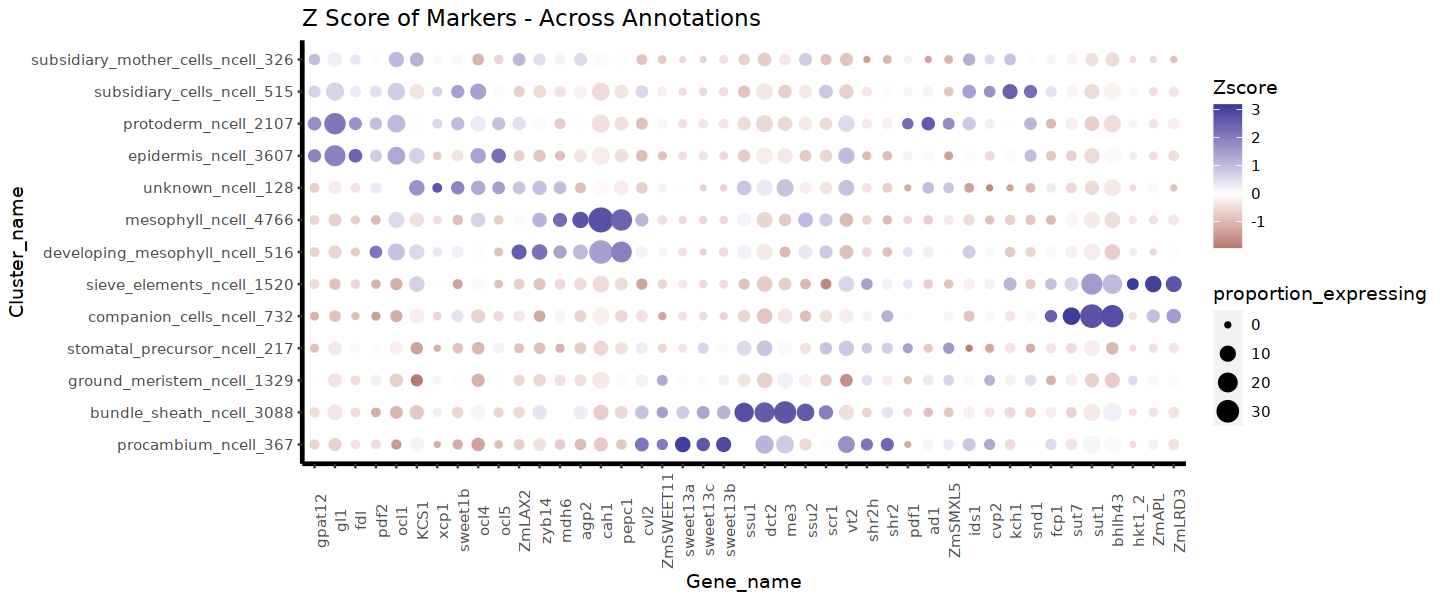

In [12]:
options(repr.plot.width=12, repr.plot.height=5)

supplamental_marker_dotplot_final <- marker_final_plotting  %>% 
    mutate(Gene_name = factor(name, clust$labels[clust$order]),
          Cluster_name = factor(v4_annotation_n, levels = v_clust$labels[v_clust$order])) %>% 
    filter(is.na(Gene_name) != TRUE) %>% 
    ggplot(., aes(y=Cluster_name, x = Gene_name, 
                               color = Zscore, size = proportion_expressing)) + 
    geom_point() + theme(axis.text.x = element_text(angle = 90)) + scale_colour_gradient2() +
    theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(), panel.background = element_blank(), axis.line.x = element_line(color="black", size = 1), axis.line.y = element_line(color="black", size = 1)) +
    ggtitle("Z Score of Markers - Across Annotations")

supplamental_marker_dotplot_final


ggsave("zm_all_marker_dotplot.supplamental.pdf", plot = supplamental_marker_dotplot_final,
    path = "/home/jpm73279/data_copy_over/comparative_single_cell_imgs/figures/figure_1/dotplots",
    width = 10, height = 5,
    units = c('in'), limitsize = FALSE, dpi = 300)


# Generate Dotplot of HQ markers. 2-5 per cell type

In [13]:
### 7/23/2022 List of maarkers
good_marker_list <- c('pepc1', "cah1", #Ms Markers
                      
                      "ssu1", "ssu2", "me3", #BS Markers
                      "sut1", "sut7",#copmanion_cells
                      "shr2h", "shr2", "shr1_v4v5count_1", "ZmSMXL5", #vasculature/procambium
                      "gl1","gpat12","gpat11", "vt2", #epidermis
                      "kch1", "cts1", #subsidary_cells
                      "xcp1", "xcp2", #xylem
                      "ocl1", "ids1", #protoderm
                      "ZmAPL", "ZmAAP6_4", "htk1_2", #vascular parenchmya
                      "fama_v4v5count_1", #guard_cell
                      "ocl1", "ocl4") #protoderm

good_gene_markers <- gene_markers  %>% 
    filter(name %in% good_marker_list)
head(good_gene_markers)

marker_final_plotting <- left_join(altered_deseq2, wider_all_genes_altered, by = c("v4_annotation_n", "geneID")) %>% 
        left_join(., gene_markers, by = c("geneID"))

test_marker_clust <- marker_final_plotting  %>% 
    filter(geneID %in% good_gene_markers$geneID)  %>% 
    ungroup() %>% 
    dplyr::select(v4_annotation_n, Zscore, name)  %>% 
    pivot_wider(names_from = v4_annotation_n, values_from = Zscore) %>% 
      data.frame() # make df as tibbles -> matrix annoying

row.names(test_marker_clust) <- test_marker_clust$name  # put gene in `row`
test_marker_clust <- test_marker_clust[,-1] #drop gene column as now in rows
clust <- hclust(dist(test_marker_clust %>% as.matrix())) # hclust with distance matrix


mat <- marker_final_plotting %>% 
    filter(geneID %in% good_gene_markers$geneID)  %>% 
    ungroup() %>% 
    dplyr::select(v4_annotation_n, Zscore, name)  %>% 
    pivot_wider(names_from = v4_annotation_n, values_from = Zscore) %>% 
      data.frame() # make df as tibbles -> matrix annoying
row.names(mat) <- mat$name  # put gene in `row`
mat <- mat[,-1] #drop gene column as now in rows
v_clust <- hclust(dist(mat %>% as.matrix() %>% t())) # hclust with distance matrix

options(repr.plot.width=8, repr.plot.height=12)

,chr,start,end,geneID,name,type,tissue
,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>
1,chr2,147040782,147041974,Zm00001eb092540,ssu2,bundle_sheath,axillaryBud;leaf
2,chr4,196177320,196178190,Zm00001eb197410,ssu1,bundle_sheath,axillaryBud;leaf
3,chr3,7184482,7190135,Zm00001eb121470,me3,bundle_sheath,axillaryBud;leaf
4,chr1,15196463,15201827,Zm00001eb005460,sut1,"companion_cells,xylem_parenchyma,phloem_parenchyma,pith_parenchyma",axillaryBud;leaf;crownRoot;root;tassel;ear
5,chr9,157693146,157697816,Zm00001eb402200,sut7,"companion_cells,xylem_parenchyma,phloem_parenchyma,pith_parenchyma",axillaryBud;leaf;crownRoot;root;tassel;ear
6,chr7,123684235,123693464,Zm00001eb313510,gl1,epidermis,axillaryBud;leaf;crownRoot;root


In [14]:
options(repr.plot.width=10, repr.plot.height=5)

figure_marker_dotplot <- marker_final_plotting  %>% 
    mutate(Gene_name = factor(name, clust$labels[clust$order]),
          Cluster_name = factor(v4_annotation_n, levels = v_clust$labels[v_clust$order])) %>% 
    filter(is.na(Gene_name) != TRUE) %>% 
    ggplot(., aes(y=Cluster_name, x = Gene_name, 
                               color = Zscore, size = proportion_expressing)) + 
    geom_point() + theme(axis.text.x = element_text(angle = 90)) + scale_colour_gradient2() +
    theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(), panel.background = element_blank(), axis.line.x = element_line(color="black", size = 1), axis.line.y = element_line(color="black", size = 1)) +
    ggtitle("Z Score of Markers - Across Annotations") 


ggsave("zm_selected_marker_dotplot.main_figure.pdf", plot = figure_marker_dotplot,
    path = "/home/jpm73279/data_copy_over/comparative_single_cell_imgs/figures/figure_1/dotplots",
    width = 10, height = 5,
    units = c('in'), limitsize = FALSE, dpi = 300)

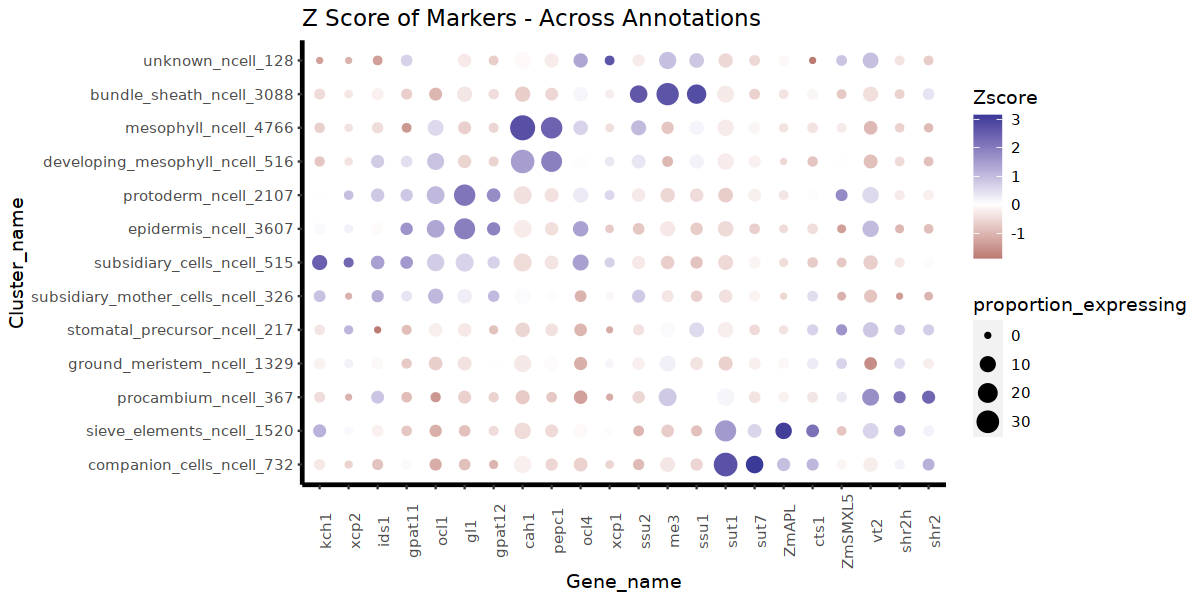

In [15]:
figure_marker_dotplot

In [ ]:
options(repr.plot.width=10, repr.plot.height=10)
# Generate Quick graph about saturation of Tn5 per cluster 
library("ggdist")
meta_data  %>% 
    ggplot(., aes(x = v4_annotation_n, log(total))) + 
    geom_violin() +
      geom_boxplot(width = .2, coef = 0) +
    theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5))
    
meta_data  %>% 
    ggplot(., aes(x = v4_annotation_n, log(nSites))) + 
    geom_violin() +
      geom_boxplot(width = .2, coef = 0) +
    theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5))
    


In [ ]:
meta_data  %>% 
    group_by(V3_annotation_n)  %>% 
    summarise(mean_tn5 = mean(total),
              total_tn5 = sum(total), 
              quants = quantile(total, c(0.25, 0.5, 0.75)), q = c(0.25, 0.5, 0.75),
              counts = n())